In [ ]:
# With Literature Data Only

Training RMSE: 0.0017
Testing RMSE: 0.0167
Training MSE: 0.0000
Testing MSE: 0.0003
Training MAE: 0.0003
Testing MAE: 0.0126
Training R2: 0.9997
Testing R2: 0.9751


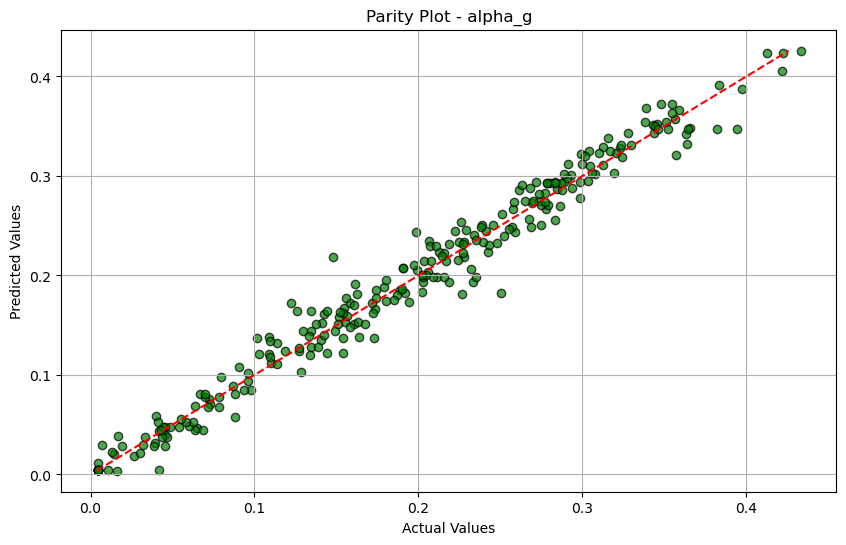

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('LOSO_DT.xlsx', sheet_name='Literature')
data.describe()

# Define input and output variables
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['alpha_g']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()
scaler_z = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
z_train_scaled = scaler_z.fit_transform(z_train)
z_test_scaled = scaler_z.transform(z_test)

# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train_scaled, z_train_scaled)

# Predict on training and testing data
z_train_pred_scaled = dt.predict(X_train_scaled)
z_test_pred_scaled = dt.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1))
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1))

# Calculate RMSE, MSE, MAE, and R2
train_rmse = np.sqrt(mean_squared_error(z_train, z_train_pred))
test_rmse = np.sqrt(mean_squared_error(z_test, z_test_pred))

train_mse = mean_squared_error(z_train, z_train_pred)
test_mse = mean_squared_error(z_test, z_test_pred)

train_mae = mean_absolute_error(z_train, z_train_pred)
test_mae = mean_absolute_error(z_test, z_test_pred)

train_r2 = r2_score(z_train, z_train_pred)
test_r2 = r2_score(z_test, z_test_pred)

# Print the performance metrics
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Testing RMSE: {test_rmse:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'Testing MAE: {test_mae:.4f}')
print(f'Training R2: {train_r2:.4f}')
print(f'Testing R2: {test_r2:.4f}')

# Parity plot for the test data
plt.figure(figsize=(10, 6))
plt.scatter(z_test, z_test_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(z_test_pred), max(z_test_pred)], [min(z_test_pred), max(z_test_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot - alpha_g')
plt.grid(True)
plt.show()



In [ ]:
# With Experiment Data Only

Training RMSE: 0.0000
Testing RMSE: 0.0295
Training MSE: 0.0000
Testing MSE: 0.0009
Training MAE: 0.0000
Testing MAE: 0.0219
Training R2: 1.0000
Testing R2: 0.9629


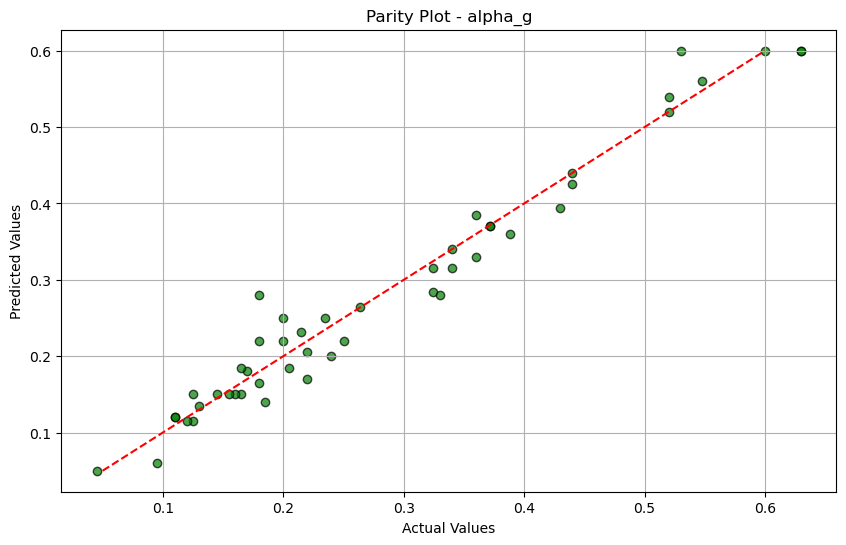

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('LOSO_DT.xlsx', sheet_name='Experiment')
data.describe()

# Define input and output variables
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['alpha_g']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()
scaler_z = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
z_train_scaled = scaler_z.fit_transform(z_train)
z_test_scaled = scaler_z.transform(z_test)

# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train_scaled, z_train_scaled)

# Predict on training and testing data
z_train_pred_scaled = dt.predict(X_train_scaled)
z_test_pred_scaled = dt.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1))
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1))

# Calculate RMSE, MSE, MAE, and R2
train_rmse = np.sqrt(mean_squared_error(z_train, z_train_pred))
test_rmse = np.sqrt(mean_squared_error(z_test, z_test_pred))

train_mse = mean_squared_error(z_train, z_train_pred)
test_mse = mean_squared_error(z_test, z_test_pred)

train_mae = mean_absolute_error(z_train, z_train_pred)
test_mae = mean_absolute_error(z_test, z_test_pred)

train_r2 = r2_score(z_train, z_train_pred)
test_r2 = r2_score(z_test, z_test_pred)

# Print the performance metrics
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Testing RMSE: {test_rmse:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'Testing MAE: {test_mae:.4f}')
print(f'Training R2: {train_r2:.4f}')
print(f'Testing R2: {test_r2:.4f}')

# Parity plot for the test data
plt.figure(figsize=(10, 6))
plt.scatter(z_test, z_test_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(z_test_pred), max(z_test_pred)], [min(z_test_pred), max(z_test_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot - alpha_g')
plt.grid(True)
plt.show()



In [ ]:
# Validation With External (Our Experimental Data) Data

=== External Validation (Train: Literature | Test: Experimental) ===
RMSE: 0.1656
MSE : 0.0274
MAE : 0.1254
R²  : 0.0409


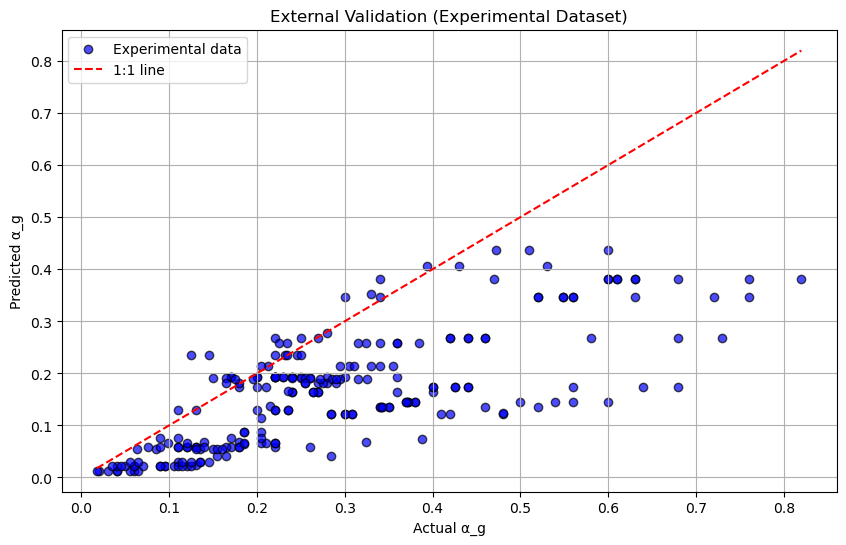

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('LOSO_DT.xlsx', sheet_name='LOSO')

# Define input and output variables
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['alpha_g']]

# ================================
# Split into Literature vs Experimental
# ================================
# Literature data (rows 2–1311 in Excel -> iloc[1:1311] in Python)
X_lit = X.iloc[1:1311].copy()
z_lit = z.iloc[1:1311].copy()

# Experimental data (rows 1312–1550 in Excel -> iloc[1311:1550] in Python)
X_exp = X.iloc[1311:1550].copy()
z_exp = z.iloc[1311:1550].copy()

# ================================
# Scaling (fit only on literature data, transform both)
# ================================
scaler_X = MinMaxScaler()
scaler_z = MinMaxScaler()

X_lit_scaled = scaler_X.fit_transform(X_lit)
X_exp_scaled = scaler_X.transform(X_exp)

z_lit_scaled = scaler_z.fit_transform(z_lit)
z_exp_scaled = scaler_z.transform(z_exp)

# ================================
# Train Decision Tree on Literature
# ================================
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_lit_scaled, z_lit_scaled)

# ================================
# Predict Experimental Dataset
# ================================
z_exp_pred_scaled = dt.predict(X_exp_scaled)
z_exp_pred = scaler_z.inverse_transform(z_exp_pred_scaled.reshape(-1, 1))

# ================================
# Performance Metrics
# ================================
rmse = np.sqrt(mean_squared_error(z_exp, z_exp_pred))
mse = mean_squared_error(z_exp, z_exp_pred)
mae = mean_absolute_error(z_exp, z_exp_pred)
r2 = r2_score(z_exp, z_exp_pred)

print("=== External Validation (Train: Literature | Test: Experimental) ===")
print(f'RMSE: {rmse:.4f}')
print(f'MSE : {mse:.4f}')
print(f'MAE : {mae:.4f}')
print(f'R²  : {r2:.4f}')

# ================================
# Save Parity Data to Excel
# ================================
parity_df = pd.DataFrame({
    'Actual_alpha_g': z_exp.values.flatten(),
    'Predicted_alpha_g': z_exp_pred.flatten()
})
# parity_df.to_excel('Parity_Data_External_Validation.xlsx', index=False)
# print("\nParity data saved to 'Parity_Data_External_Validation.xlsx'")

# ================================
# Parity Plot
# ================================
plt.figure(figsize=(10, 6))
plt.scatter(z_exp, z_exp_pred, color='blue', edgecolor='k', alpha=0.7, label='Experimental data')
plt.plot([min(z_exp.values), max(z_exp.values)],
         [min(z_exp.values), max(z_exp.values)], 'r--', label='1:1 line')
plt.xlabel('Actual α_g')
plt.ylabel('Predicted α_g')
plt.title('External Validation (Experimental Dataset)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Combined Data (Literature and Our Experiments)

Training RMSE: 0.0017
Testing RMSE: 0.0192
Training MSE: 0.0000
Testing MSE: 0.0004
Training MAE: 0.0003
Testing MAE: 0.0129
Training R2: 0.9998
Testing R2: 0.9750


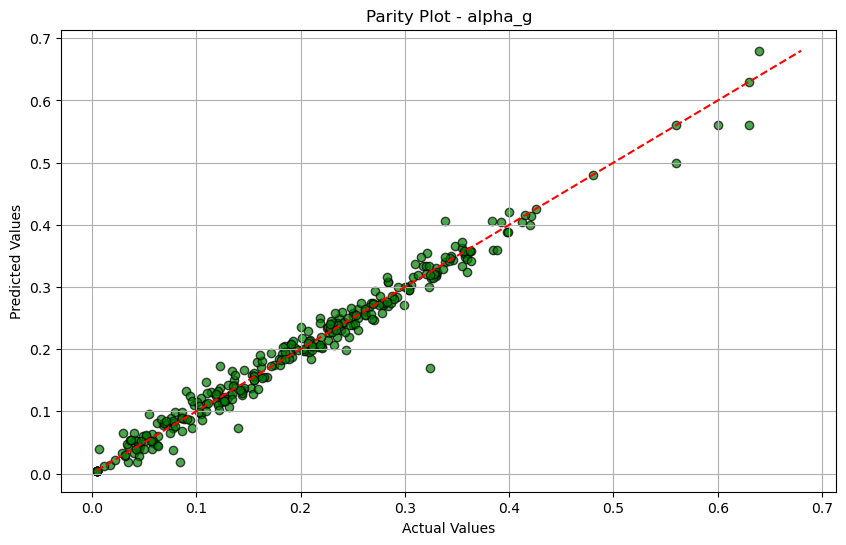

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('LOSO_DT.xlsx', sheet_name='LOSO')
data.describe()

# Define input and output variables
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['alpha_g']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()
scaler_z = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
z_train_scaled = scaler_z.fit_transform(z_train)
z_test_scaled = scaler_z.transform(z_test)

# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train_scaled, z_train_scaled)

# Predict on training and testing data
z_train_pred_scaled = dt.predict(X_train_scaled)
z_test_pred_scaled = dt.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1))
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1))

# Calculate RMSE, MSE, MAE, and R2
train_rmse = np.sqrt(mean_squared_error(z_train, z_train_pred))
test_rmse = np.sqrt(mean_squared_error(z_test, z_test_pred))

train_mse = mean_squared_error(z_train, z_train_pred)
test_mse = mean_squared_error(z_test, z_test_pred)

train_mae = mean_absolute_error(z_train, z_train_pred)
test_mae = mean_absolute_error(z_test, z_test_pred)

train_r2 = r2_score(z_train, z_train_pred)
test_r2 = r2_score(z_test, z_test_pred)

# Print the performance metrics
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Testing RMSE: {test_rmse:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'Testing MAE: {test_mae:.4f}')
print(f'Training R2: {train_r2:.4f}')
print(f'Testing R2: {test_r2:.4f}')

# Parity plot for the test data
plt.figure(figsize=(10, 6))
plt.scatter(z_test, z_test_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(z_test_pred), max(z_test_pred)], [min(z_test_pred), max(z_test_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot - alpha_g')
plt.grid(True)
plt.show()

